In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/train.csv')

In [ ]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

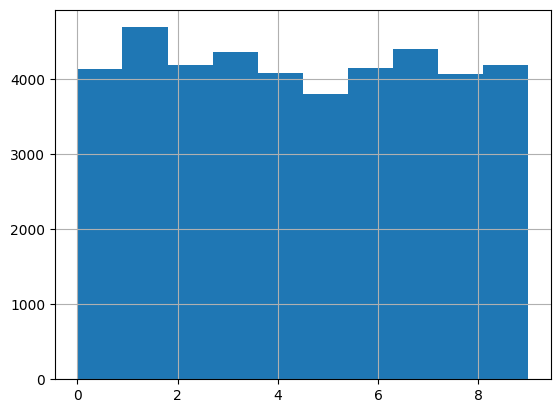

In [ ]:
data['label'].hist()

In [ ]:
def check_data_cleanliness(data):
    if np.isnan(data).any():
        print("Warning: Data contains NaN values.")

    if np.isinf(data).any():
        print("Warning: Data contains infinite values.")

    # Define an extreme threshold for your data
    extreme_threshold = 1e3
    if np.any(np.abs(data) > extreme_threshold):
        print(f"Warning: Data contains values outside the range -{extreme_threshold} to {extreme_threshold}.")

    if not (np.isfinite(data)).all():
        print("Data contains non-finite values (NaN, inf, or -inf).")
    else:
        print("Data is clean (all values are finite and within expected range).")

In [ ]:
data = np.array(data)
m,n = data.shape

In [ ]:
check_data_cleanliness(data)

Data is clean (all values are finite and within expected range).


In [ ]:
data_test = data[:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test =X_test / 255.

In [ ]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

In [ ]:
def initalize_parametrs():
  w1 = np.random.rand(10,784) - 0.5
  b1 = np.random.rand(10,1) - 0.5

  w2 = np.random.rand(10,10) - 0.5
  b2 = np.random.rand(10,1) - 0.5

  return w1 , b1 , w2 , b2

In [ ]:
def ReLu(M):
  return np.maximum(M , 0)

In [ ]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [ ]:
def fpropagation(w1 , b1 , w2 , b2, X):
  z1 = w1.dot(X) + b1

  a1 = ReLu(z1)

  z2 = w2.dot(a1) + b2

  a2 = softmax(z2)

  return a1 , z1 , a2 , z2

In [ ]:
def one_hot_encode(Y):
  one_hot_y = np.zeros((Y.size , Y.max() + 1))
  one_hot_y[np.arange(Y.size) , Y] = 1
  one_hot_y = one_hot_y.T
  return one_hot_y

In [ ]:
def derivative_ReLu(M):
  return M > 0

In [ ]:
def bpropagation(a1 , z1 , a2 , z2 , w2,X, Y):
  _,n = X.shape
  y_encoded = one_hot_encode(Y)

  dz2 = a2 - y_encoded

  dw2 = 1/n*dz2.dot(a1.T)

  db2 = 1/n*np.sum(dz2)

  dz1 = w2.T.dot(dz2) * derivative_ReLu(z1)

  dw1 =1/n*dz1.dot(X.T)

  db1 = 1/n*np.sum(dz1)

  return dw1, db1, dw2, db2

In [ ]:
def update_parametrs(w1 ,b1 ,w2 ,b2 ,dw1 ,db1 ,dw2 ,db2 ,alpha):
  w1 = w1 - alpha*dw1

  b1 = b1 - alpha*db1

  w2 = w2 - alpha*dw2

  b2 = b2 - alpha*db2

  return w1 , b1 , w2 , b2

In [ ]:
def predictions(M):
  return np.argmax( M , 0 )

In [ ]:
def accuracy(predictions, Y):
  return np.sum(predictions == Y) / Y.size

In [ ]:
def gradient_descent(X , Y , ittr , alpha):
  w1 , b1 , w2, b2 = initalize_parametrs()

  for i in range(ittr):

    a1 , z1 , a2 , z2 = fpropagation(w1,b1,w2,b2,X)

    dw1, db1, dw2, db2 = bpropagation(a1,z1,a2,z2,w2,X,Y)

    w1 , b1 , w2, b2 = update_parametrs(w1 ,b1 ,w2 ,b2 ,dw1 ,db1 ,dw2 ,db2 ,alpha)

    if i%100 == 0:
      print('Ittr:',i)
      print(accuracy(predictions(a2),Y))
  return w1 , b1 , w2 , b2


In [ ]:
w1, b1, w2, b2 = gradient_descent(X_train , Y_train , 1000 , 0.1)

Ittr: 0
0.09943902439024391
Ittr: 100
0.6031219512195122
Ittr: 200
0.7486341463414634
Ittr: 300
0.8048048780487805
Ittr: 400
0.8323658536585365
Ittr: 500
0.8480731707317073
Ittr: 600
0.858390243902439
Ittr: 700
0.865609756097561
Ittr: 800
0.8722682926829268
Ittr: 900
0.8767317073170732


In [ ]:
def make_predictions(X, w1 , b1 , w2 , b2):
  _ , _ , _ , a2 = fpropagation(w1 , b1 , w2 , b2, X)

  return predictions(a2)

def test(index , w1 , b1 , w2 , b2):
  curr_img = X_test[:,index,None]

  prediction = make_predictions(X_test[:,index,None], w1, b1, w2, b2)

  label = Y_test[index]
  print('Prediction is ',prediction)
  print('Actual is ', label)

  curr_img = curr_img.reshape((28,28))*255
  plt.gray()
  plt.imshow(curr_img)
  plt.show()

Prediction is  [4]
Actual is  4


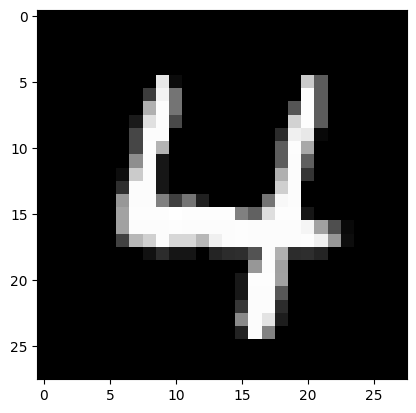

In [ ]:
test(42, w1 , b1 , w2 , b2)